# 스포츠 센터 데이터 분석 Case Study

## 데이터 설명 및 스키마

* 회원 종류
    - 종일 회원 : 언제든지 사용할 수 있음
    - 주간 회원 : 낮에만 사용할 수 있음
    - 야간 회원 : 야간에만 사용할 수 있음

|파일이름|데이터 정보|
|---|---|
|use_log.csv|스포츠 센터 이용 이력 데이터로 기간은 2018년 4월 ~ 2019년 3월|
|customer_master.csv|2019년 3월 말 시점의 회원 데이터|
|class_master.csv|회원 구분 데이터(종일, 주간, 야간)|
|campaign_master.csv|캠페인 구분 데이터(입회비 유무 등)|

## 데이터 불러오기

In [9]:
import pandas as pd

# uselog data import
uselog = pd.read_csv('/content/drive/MyDrive/python/스포츠센터_데이터_분석/data/use_log.csv')
print(uselog.info())
print('--------------------------------------------------')
print(uselog.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB
None
--------------------------------------------------
            log_id customer_id     usedate
0  L00000049012330    AS009373  2018-04-01
1  L00000049012331    AS015315  2018-04-01
2  L00000049012332    AS040841  2018-04-01
3  L00000049012333    AS046594  2018-04-01
4  L00000049012334    AS073285  2018-04-01


In [10]:
# customer master data import
customer = pd.read_csv('/content/drive/MyDrive/python/스포츠센터_데이터_분석/data/customer_master.csv')
print(customer.info())
print('--------------------------------------------------')
print(customer.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  4192 non-null   object
 1   name         4192 non-null   object
 2   class        4192 non-null   object
 3   gender       4192 non-null   object
 4   start_date   4192 non-null   object
 5   end_date     1350 non-null   object
 6   campaign_id  4192 non-null   object
 7   is_deleted   4192 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 262.1+ KB
None
--------------------------------------------------
  customer_id   name class gender           start_date end_date campaign_id  \
0    OA832399   XXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
1    PL270116  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
2    OA974876  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
3    HD024127  XXXXX   C01      F  2015-05-01 00:00:00      

In [11]:
# class master data import
class_master = pd.read_csv('/content/drive/MyDrive/python/스포츠센터_데이터_분석/data/class_master.csv')
print(class_master.info())
print('--------------------------------------------------')
print(class_master.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       3 non-null      object
 1   class_name  3 non-null      object
 2   price       3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes
None
--------------------------------------------------
  class class_name  price
0   C01       0_종일  10500
1   C02       1_주간   7500
2   C03       2_야간   6000


In [12]:
# campaign master data import
campaign_master = pd.read_csv('/content/drive/MyDrive/python/스포츠센터_데이터_분석/data/campaign_master.csv')
print(campaign_master.info())
print('--------------------------------------------------')
print(campaign_master.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    3 non-null      object
 1   campaign_name  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes
None
--------------------------------------------------
  campaign_id campaign_name
0         CA1          2_일반
1         CA2     0_입회비반액할인
2         CA3       1_입회비무료


## 고객 마스터 데이터 전처리 및 탐색

### 데이터 조인

In [13]:
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [14]:
# 결측치 데이터 확인
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

### 고객 데이터 집계

In [33]:
# 회원 구분별 고객 수 현황
class_name_stat = customer_join.groupby('class_name').count()["customer_id"].reset_index()
class_name_stat.rename(columns={"customer_id": "cnt_cust"}, inplace=True)

# 비중 계산
total_customers = class_name_stat['cnt_cust'].sum()
class_name_stat['cust_ratio'] = class_name_stat['cnt_cust'] / total_customers

class_name_stat

,class_name,cnt_cust,cust_ratio
0,0_종일,2045,0.487834
1,1_주간,1019,0.243082
2,2_야간,1128,0.269084


In [34]:
# 캠페인별 고객 수 집계
campaign_name_stat = customer_join.groupby('campaign_name').count()["customer_id"].reset_index()
campaign_name_stat.rename(columns={"customer_id": "cnt_cust"}, inplace=True)

# 비중 계산
total_customers = campaign_name_stat['cnt_cust'].sum()
campaign_name_stat['cust_ratio'] = campaign_name_stat['cnt_cust'] / total_customers

campaign_name_stat

,campaign_name,cnt_cust,cust_ratio
0,0_입회비반액할인,650,0.155057
1,1_입회비무료,492,0.117366
2,2_일반,3050,0.727576


In [35]:
# 성별 고객 수 집계
gender_stat = customer_join.groupby('gender').count()["customer_id"].reset_index()
gender_stat.rename(columns={"customer_id": "cnt_cust"}, inplace=True)

# 비중 계산
total_customers = gender_stat['cnt_cust'].sum()
gender_stat['cust_ratio'] = gender_stat['cnt_cust'] / total_customers

gender_stat

,gender,cnt_cust,cust_ratio
0,F,1983,0.473044
1,M,2209,0.526956


In [36]:
# 회원 탈퇴 여부별 고객 수 집계
is_deleted_stat = customer_join.groupby('is_deleted').count()["customer_id"].reset_index()
is_deleted_stat.rename(columns={"customer_id": "cnt_cust"}, inplace=True)

# 비중 계산
total_customers = is_deleted_stat['cnt_cust'].sum()
is_deleted_stat['cust_ratio'] = is_deleted_stat['cnt_cust'] / total_customers

is_deleted_stat

,is_deleted,cnt_cust,cust_ratio
0,0,2842,0.677958
1,1,1350,0.322042


In [20]:
# 특정 가입 기간 고객 수 집계
## 2018-04-01부터 2019-03-31 가입 고객 수
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"] >= pd.to_datetime("20180401")]
print(len(customer_start))

1376


### 최신 고객 데이터 집계

2019년 3월 고객 데이터 파악하기

In [22]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

#### 회원 구분, 캠페인 구분, 성별 파악

In [37]:
# 회원 구분별 고객 수 현황
class_name_stat = customer_newer.groupby('class_name').count()["customer_id"].reset_index()
class_name_stat.rename(columns={"customer_id": "cnt_cust"}, inplace=True)

# 비중 계산
total_customers = class_name_stat['cnt_cust'].sum()
class_name_stat['cust_ratio'] = class_name_stat['cnt_cust'] / total_customers

class_name_stat

,class_name,cnt_cust,cust_ratio
0,0_종일,1444,0.488994
1,1_주간,696,0.235693
2,2_야간,813,0.275313


In [38]:
# 캠페인별 고객 수 집계
campaign_name_stat = customer_newer.groupby('campaign_name').count()["customer_id"].reset_index()
campaign_name_stat.rename(columns={"customer_id": "cnt_cust"}, inplace=True)

# 비중 계산
total_customers = campaign_name_stat['cnt_cust'].sum()
campaign_name_stat['cust_ratio'] = campaign_name_stat['cnt_cust'] / total_customers

campaign_name_stat

,campaign_name,cnt_cust,cust_ratio
0,0_입회비반액할인,311,0.105317
1,1_입회비무료,242,0.081951
2,2_일반,2400,0.812733


In [39]:
# 성별 고객 수 집계
gender_stat = customer_newer.groupby('gender').count()["customer_id"].reset_index()
gender_stat.rename(columns={"customer_id": "cnt_cust"}, inplace=True)

# 비중 계산
total_customers = gender_stat['cnt_cust'].sum()
gender_stat['cust_ratio'] = gender_stat['cnt_cust'] / total_customers

gender_stat

,gender,cnt_cust,cust_ratio
0,F,1400,0.474094
1,M,1553,0.525906


## 이용 이력 데이터 전처리 및 탐색

### 고객별 이용 횟수 집계

In [42]:
# datetime 형식으로 변환
uselog["usedate"] = pd.to_datetime(uselog["usedate"])

# 월별로 그룹화하여 사용자별 사용 횟수 계산
uselog["ym"] = uselog["usedate"].dt.strftime("%Y-%m")
uselog_months = uselog.groupby(["ym", "customer_id"], as_index=False).count()

# 컬럼명 변경
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
# usedate 컬럼 삭제
del uselog_months["usedate"]

uselog_months.head()

,ym,customer_id,count
0,2018-04,AS002855,4
1,2018-04,AS009013,2
2,2018-04,AS009373,3
3,2018-04,AS015315,6
4,2018-04,AS015739,7


### 고객별 평균값, 중앙값, 최댓값, 최솟값 집계

In [43]:
uselog_customer = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min"])["count"]
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

<ipython-input-43-578a583a0225>:1: FutureWarning: ['ym'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  uselog_customer = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min"])["count"]


,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


### 파생 컬럼 생성 (정기 이용 여부 플래그)

정기적으로 스포츠 센터를 이용하는 고객을 특정하기 위해 아래와 같은 기준으로 정기 이용 여부를 판단<br>
<br>
**고객마다 월/요일별로 이용 이력을 집계하고, 최댓값이 4 이상인 요일이 하나라도 있는 회원은 플래그를 1로 처리**

In [46]:
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id", "ym", "weekday"], as_index=False).count()[["customer_id", "ym", "weekday", "log_id"]]
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,ym,weekday,count
0,AS002855,2018-04,5,4
1,AS002855,2018-05,2,1
2,AS002855,2018-05,5,4
3,AS002855,2018-06,5,5
4,AS002855,2018-07,1,1


In [47]:
uselog_weekday = uselog_weekday.groupby("customer_id", as_index=False).max()[["customer_id", "count"]]
uselog_weekday["routine_flg"] = 0
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


## 고객 데이터와 이용 이력 데이터 결합

In [48]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [49]:
# 결측치 데이터 확인
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

### 회원 기간 계산

In [50]:
from dateutil.relativedelta import relativedelta

customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))

customer_join["membership_period"] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months

customer_join.head()

<ipython-input-50-32fa8a7481cd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


### 통계량 파악

In [51]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [53]:
# 루틴 플래그별 집계
routine_flg_stat = customer_join.groupby('routine_flg').count()["customer_id"].reset_index()
routine_flg_stat.rename(columns={"customer_id": "cnt_cust"}, inplace=True)

# 비중 계산
total_customers = routine_flg_stat['cnt_cust'].sum()
routine_flg_stat['cust_ratio'] = routine_flg_stat['cnt_cust'] / total_customers

routine_flg_stat

,routine_flg,cnt_cust,cust_ratio
0,0,779,0.18583
1,1,3413,0.81417


### 회원 기간 분포(시각화)

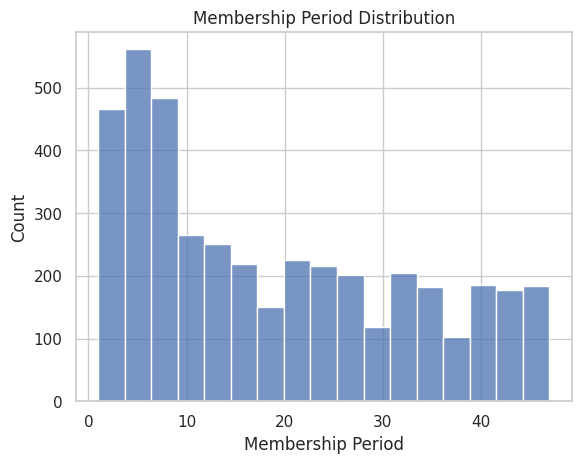

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn 스타일 설정
sns.set(style="whitegrid")

# 히스토그램 그리기
sns.histplot(customer_join["membership_period"], kde=False)

# 그래프 제목 설정
plt.title("Membership Period Distribution")

# x축 라벨 설정
plt.xlabel("Membership Period")

# 그래프 출력
plt.show()

### 탈퇴 회원과 지속 회원의 차이 파악

In [56]:
customer_end = customer_join.loc[customer_join["is_deleted"] ==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [57]:
customer_stay = customer_join.loc[customer_join["is_deleted"] ==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [58]:
# customer_join CSV 파일 저장
customer_join.to_csv('/content/drive/MyDrive/python/스포츠센터_데이터_분석/data/customer_join.csv', index=False)